# The X-files problem

## Introduction of the problem:
So this problem has two main objectives:

* Tell the Strange Man where he should go in order to see some kind of UFO
* Present the findings in an appealing way to his shareholders

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('UFO_sightings.csv', low_memory = False, na_filter = True, skip_blank_lines = True)
df.columns = ['datetime', 'city', 'state', 'country', 'shape', 'duration1',
       'duration2', 'comments', 'dateposted', 'lat','lon']

In [9]:
df.shape

(80332, 11)

In [10]:
df.dtypes

datetime       object
city           object
state          object
country        object
shape          object
duration1      object
duration2      object
comments       object
dateposted     object
lat            object
lon           float64
dtype: object

In [11]:
df.head(2)

,datetime,city,state,country,shape,duration1,duration2,comments,dateposted,lat,lon
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082


In [12]:
df_na = df.isna().sum()
print('NA values:')
df_na/len(df)

NA values:


datetime      0.000000
city          0.000000
state         0.072163
country       0.120375
shape         0.024050
duration1     0.000000
duration2     0.000000
comments      0.000187
dateposted    0.000000
lat           0.000000
lon           0.000000
dtype: float64

## Description of the variables

* datetime:	date and time of event	String
* city:	Name of the city	String
* state:	State code of event	String
* country:	Country code of event	String
* shape:	Shape of the UFO	String
* duration1:	Duration of the sighting in seconds Numeric
* duration2:	Durantion of the sighting in hours and minutes	String
* comments:	description of the event	String
* date: posted	Date when the event was reported	Date
* latitude:	Latitude of the city	Numeric
* longitude:	Longitude of the city	Numeric

## Data completeness and quality:

So the data consists of rows filled by people who think they might have seen an UFO. The dataset contains around 80 thousands rows and there is an important percentage of data which lacks some information.

Considering the nature of the problem I chose not to drop those rows, only to fix some columns which might be useful in the future.




In [13]:
df['lat'] = pd.to_numeric(df['lat'],errors = 'coerce') 
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'],errors='coerce')

In [14]:
df.shape

(80332, 11)

One useful thing to know is where have happened most of the sightings. It is the USA.

In [15]:
df.country.value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

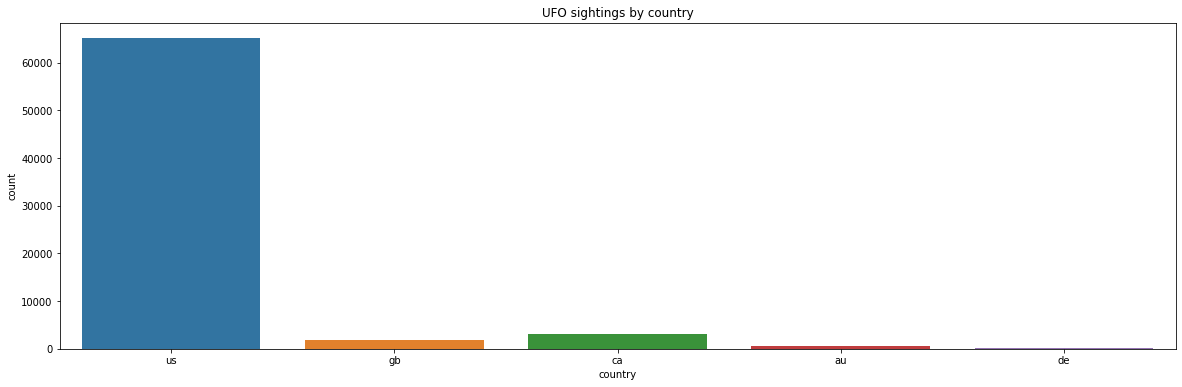

In [16]:
plt.figure(figsize=(20, 6))
plt.title('UFO sightings by country')
sns.countplot(x="country", data=df);

In [17]:
df['year'] = df.datetime.dt.year
aux_array = df.year.unique()
aux_array.sort()
aux_array

array([1906., 1910., 1916., 1920., 1925., 1929., 1930., 1931., 1933.,
       1934., 1936., 1937., 1939., 1941., 1942., 1943., 1944., 1945.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014.,   nan])

Another thing to consider is how frecuent these kind of events have happened in the past

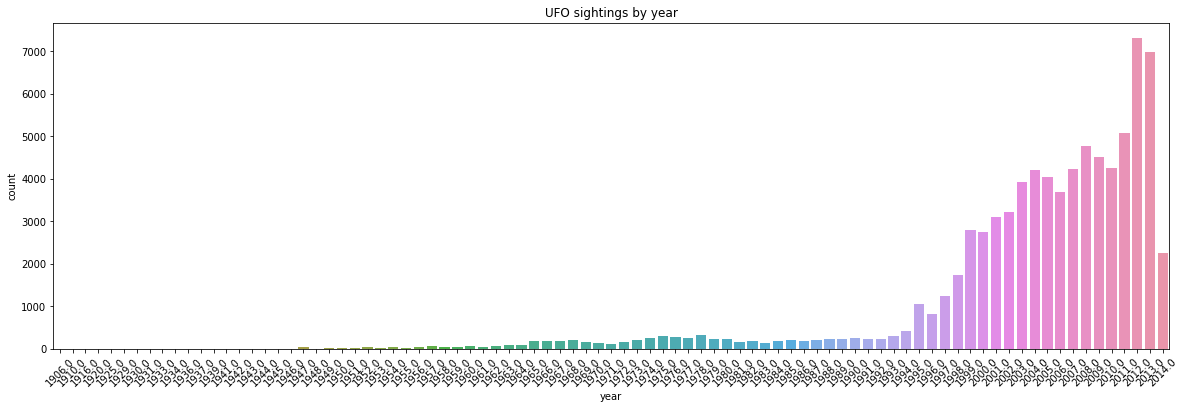

In [18]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title('UFO sightings by year')
g = sns.countplot(x="year", data=df);

It looks that most of the sightings occured from the 90's to the present.

In [19]:
df['month'] = df.datetime.dt.month
aux_array = df.month.unique()
aux_array.sort()
aux_array

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

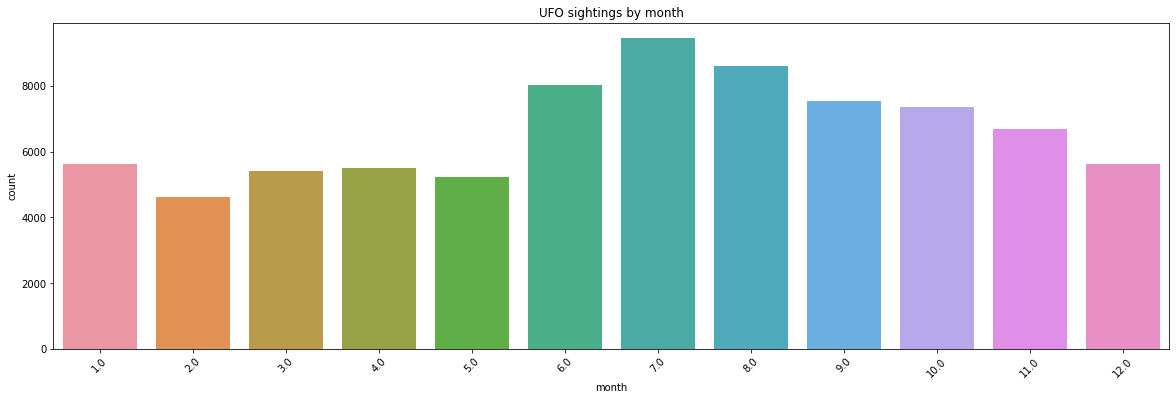

In [20]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title('UFO sightings by month')
g = sns.countplot(x="month", data=df);

It seems that the best time of the year to see an UFO is between June and September.

In [21]:
df['hour'] = df.datetime.dt.hour
aux_array = df.hour.unique()
aux_array.sort()
aux_array

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., nan])

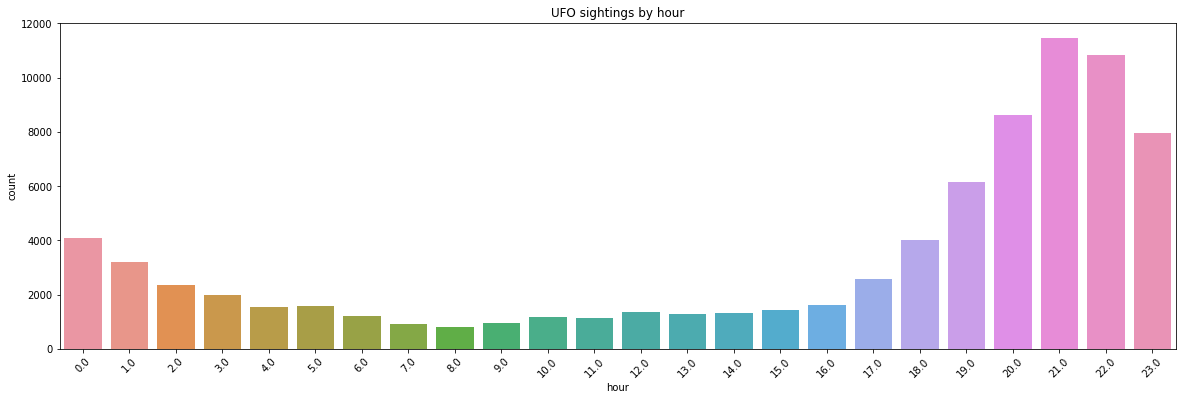

In [22]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title('UFO sightings by hour')
g = sns.countplot(x="hour", data=df);

And the best time is between 8PM and midnight

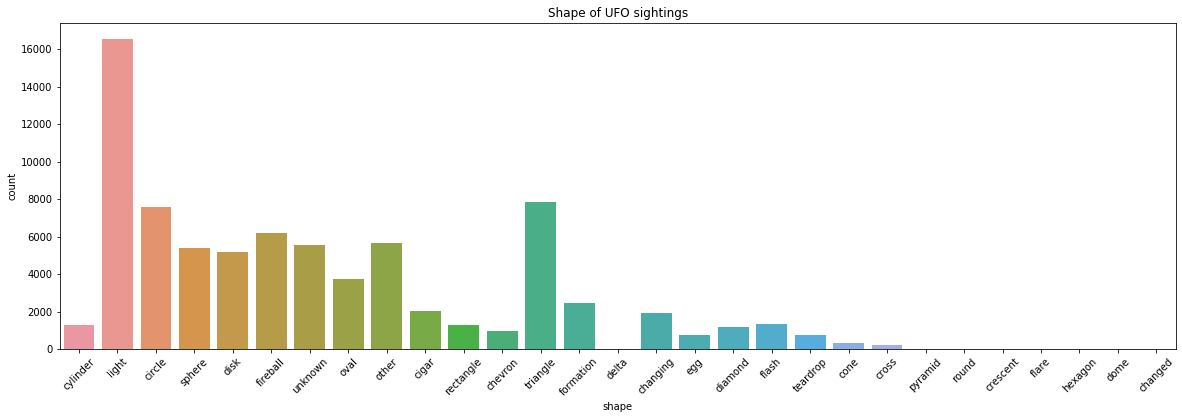

In [23]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title('Shape of UFO sightings')
g = sns.countplot(x="shape", data=df);

The most common shape of the sighting is 'light'

## The best place and time... (Hypothesis)

Given all this information, it is important to start thinking about a solution for the Strage Man. What he wants is to know to best place and time to see an UFO. However, because we don't have much information about our client, it is necesary to make some educated guesses:

The first one, is that probably, the Strange man may want to see the UFO by himself wich means he'd prefer a **city** rather than a **country** or a **state** to watch because of its smaller size.

The second guess it that, though the last data available comes from 2014. We should take into considaration the 5 last years beacause it would be more probable than taking into considaration data from 1924 (unless the Strange man had a time machine).

In [24]:
df[df.year == 2014].month.value_counts()

# The data only has the first 5 months of 2014

1.0    639
4.0    572
2.0    481
3.0    441
5.0    119
Name: month, dtype: int64

In [25]:
df_real =df[df.year > 2009]
df_real.shape

(25887, 14)

In [26]:
df_real.city.value_counts().head(10)

seattle         132
las vegas       121
portland        120
phoenix         100
orlando          93
springfield      90
myrtle beach     85
miami            83
albuquerque      82
sacramento       78
Name: city, dtype: int64

**So Seattle is the city with the most sightings from 2009 to 2014. Historically, it also has the most sightings**

In [27]:
df.city.value_counts().head(10)

seattle        525
phoenix        454
portland       374
las vegas      368
los angeles    353
san diego      338
houston        297
chicago        265
tucson         241
miami          239
Name: city, dtype: int64

In [28]:
df_seattle = df_real[df_real.city == 'seattle']

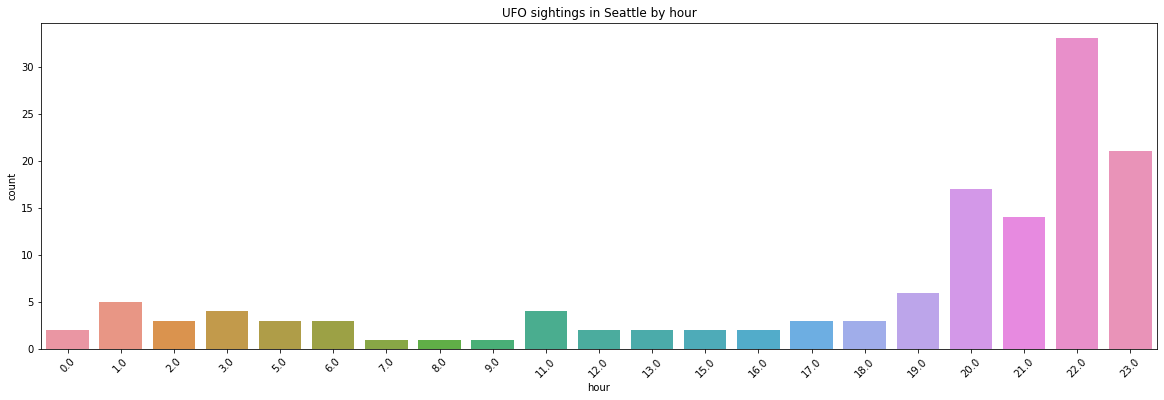

In [29]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title('UFO sightings in Seattle by hour')
g = sns.countplot(x="hour", data=df_seattle);

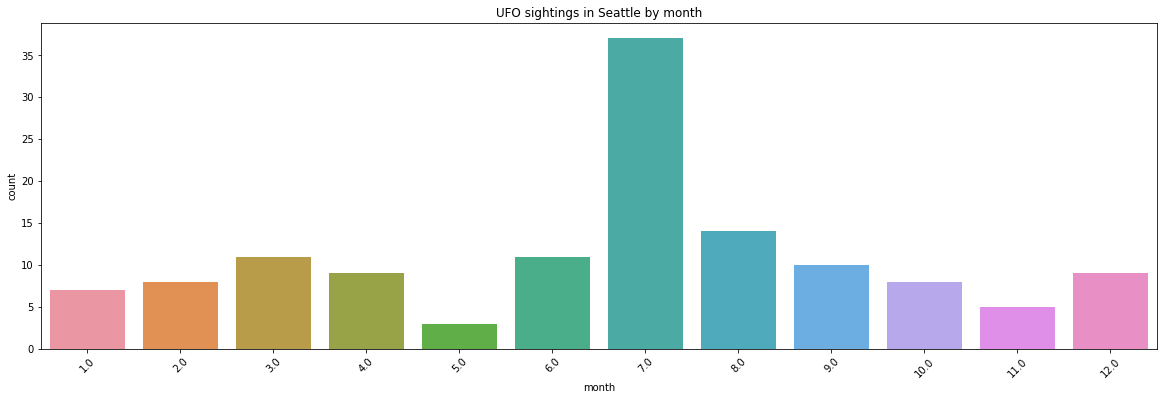

In [30]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title('UFO sightings in Seattle by month')
g = sns.countplot(x="month", data=df_seattle);

**Finally we can conclude that the best place to sight an UFO is Seattle in the USA, in the month of July, between 22 hours and midnight.** Other actions that can be taking into consideration is the use of **latitude and longitude** variables instead of **cities** to determine the best place to sight an UFO.
.